# Assignment 3: Network Simulation
## CS166 // Professor Scheffler
### Soren Gran // March 2019

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# Part 1: 2-3 Modifications
### Multiple topics
I want to add more topics. These topics will include music, politics, sports, and religion. This means that when two people interact, the same opinion and relationship calculations will be done for each topic, and then their overall relationship will be the mean of each opinion-related relationship.

### Personalized parameters
The main personalized parameters I will add will also be topic-related. Given the new multiple topics aspect of my model, I know that everybody values different topics. So some people will value politics the most, others will value religion most, and so on for sports and music. To reflect this in my model, every person who is initialized will include weights for each topic. For every new person, the weights will be sampled from a Dirichlet distribution.

This Dirichlet distribution will allow me to guide how people value topics, since most people will value politics and religion the highest. However, my choice for alpha will leave this distribution open to some variation for crazy Pittsburgh Steelers fans (may they burn in hell).

This has implications on the relationships of people, too. Because two people may value opinions differently (and therefore have different gamma values), I need to make a decision: do two people have different perceptions of their relationship depending on their individual gammas, or does their relationship depend on both of their gammas? By different perceptions of their relationship, I mean that person i would have perception i of relationship ij and person j would have perception j of relationship ij. When one person's perception of the relationship dips too low, the relationship breaks. However, this would be very complicated, requiring me to use directed edges with two edges for every relationship. I would rather have the relationship depend on both of the gammas, which I will explain in the Interaction section.

### Model persuasiveness

# Part 2: Local Analysis
## Interaction - The New Model
The current model:  
$\Delta$o<sub>i</sub> = $\alpha$w<sub>ij</sub>(o<sub>j</sub> - o<sub>i</sub>)  
$\Delta$w<sub>ij</sub> = $\beta$w<sub>ij</sub>(1 - w<sub>ij</sub>)(1 - $\gamma$|o<sub>j</sub> - o<sub>i</sub>|)

The new model, according to my specifications, will look like this:
Instead of using o to describe opinion, we now have four topical opinion variables: p (politics), r (religion), s (sports), and m (music).
Every person will have weights related to each topic. In the old model, this weight was automatically 1, since their was only one topic. The weight was then basically $\gamma$, since this parameter determined how much the opinion matters. Now, the $\gamma$ parameter will be broken up for each person to depict how much they value each topic. These gammas for each topic will be sampled from a Dirichlet for each new person. I have chosen to use the alpha (1, 1, .6, .5). Because these numbers are so low, this will allow for great variation of people's values. However, while this may not be precisely reflective of people's real-life values (most people will definitely value religion and politics much higher than sports and music), I like these parameters because of the variation it allows. Now and then, we see people who strongly value music and sports, making my model interesting.

$\gamma$<sub>p</sub>,  $\gamma$<sub>r</sub>,  $\gamma$<sub>s</sub>,  $\gamma$<sub>m</sub> ~ $\gamma$ * Dirichlet(1, 1, .6, .5)

$\Delta$p<sub>i</sub> = $\alpha$w<sub>ij</sub>(p<sub>j</sub> - p<sub>i</sub>)  
$\Delta$r<sub>i</sub> = $\alpha$w<sub>ij</sub>(r<sub>j</sub> - r<sub>i</sub>)  
$\Delta$s<sub>i</sub> = $\alpha$w<sub>ij</sub>(s<sub>j</sub> - s<sub>i</sub>)  
$\Delta$m<sub>i</sub> = $\alpha$w<sub>ij</sub>(m<sub>j</sub> - m<sub>i</sub>)  

$\Delta$w<sub>ij</sub> = $\beta$w<sub>ij</sub>(1 - w<sub>ij</sub>)(1 - .5($\gamma$<sub>p_i</sub> + $\gamma$<sub>p_j</sub>)(|p<sub>j</sub>) - p<sub>i</sub>| - .5($\gamma$<sub>r_i</sub> + $\gamma$<sub>r_j</sub>)(|r<sub>j</sub> - r<sub>i</sub>|) - .5($\gamma$<sub>s_i</sub> + $\gamma$<sub>s_j</sub>)(|s<sub>j</sub> - s<sub>i</sub>|) - .5($\gamma$<sub>m_i</sub> + $\gamma$<sub>m_j</sub>)(|m<sub>j</sub> - m<sub>i</sub>|))  

As I mentioned before, I have chosen to make the relationship variable depend on both people's weights. I have decided that the weight of each topic will simply be the mean of the topic weights for each person. Not only is this a simple way of doing it, I think this method reflects real life interactions because when two people care a lot about a topic, their will get very worked up. However, when only one cares about the topic, they may notice that it is less important to the other person and therefore not worth getting worked up over, bringing the total weight down (but still higher than the other, less passionate person's weight).

If we had two people A and B, and all of their opinions were opposite, we would see the same behavior from the original model. However, since they now have four randomly generated opinions, there is a good chance that at least one of these opinions is similar. This makes it much more difficult for their relationship to deteriorate, giving the other opinions time to approach each other. This creates a much more robust network.

## Summary
### Assumptions
I am assuming that people hold different opinions for different topics. I only use 4 topics for this simulation, but I imagine more exist.  
I am assuming that different people value topics differently, and that the distribution of value weights follows a Dirichlet with alpha = (1, 1, .6, .5). I do not claim that this distribution is a perfect reflection of real life - I believe it may give topic value weights more variation than in reality.  
I am assuming that the relationship between two people is an entity that is the same in both directions, and that relationships break when they get bad enough.  

### All Parameters and Variables
$\alpha$ - The opinion-adjustment rate. The higher this is, the more opinions will change from interaction between two people. Basically determines the magnitude of $\Delta$o.  
$\beta$ - The relationship-adjustment rate. The higher this is, the more relationships will change from every interaction. Determines the magnitude of $\Delta$w.  
$\gamma$ - The opinion-importance rate. The higher this is, the more influence difference in opinions have on relationships. If this is lower, two people can have very different opinion and their relationship will not deteriorate too much.  
&nbsp;&nbsp;&nbsp;&nbsp;$\gamma$<sub>p</sub> -  
&nbsp;&nbsp;&nbsp;&nbsp;$\gamma$<sub>r</sub> -  
&nbsp;&nbsp;&nbsp;&nbsp;$\gamma$<sub>s</sub> -  
&nbsp;&nbsp;&nbsp;&nbsp;$\gamma$<sub>m</sub> -  

### Update Rules
$\Delta$p<sub>i</sub> = $\alpha$w<sub>ij</sub>(p<sub>j</sub> - p<sub>i</sub>)  
$\Delta$r<sub>i</sub> = $\alpha$w<sub>ij</sub>(r<sub>j</sub> - r<sub>i</sub>)  
$\Delta$s<sub>i</sub> = $\alpha$w<sub>ij</sub>(s<sub>j</sub> - s<sub>i</sub>)  
$\Delta$m<sub>i</sub> = $\alpha$w<sub>ij</sub>(m<sub>j</sub> - m<sub>i</sub>)  

$\Delta$w<sub>ij</sub> = $\beta$w<sub>ij</sub>(1 - w<sub>ij</sub>)(1 - .5($\gamma$<sub>p_i</sub> + $\gamma$<sub>p_j</sub>)(|p<sub>j</sub>) - p<sub>i</sub>| - .5($\gamma$<sub>r_i</sub> + $\gamma$<sub>r_j</sub>)(|r<sub>j</sub> - r<sub>i</sub>|) - .5($\gamma$<sub>s_i</sub> + $\gamma$<sub>s_j</sub>)(|s<sub>j</sub> - s<sub>i</sub>|) - .5($\gamma$<sub>m_i</sub> + $\gamma$<sub>m_j</sub>)(|m<sub>j</sub> - m<sub>i</sub>|))  


# Part 3: Implementation (Iteration 1)

In [2]:
# This code is adapted from the implementation done in class,
# at https://gist.github.com/cscheffler/f8f8416513356e184e9568fa69c90889

class ModifiedSocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4, topic_view='politics', dir_alpha = (1, 1, .6, .5)):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        # added topic_view so users can choose what opinion topic they want to be displayed in the graph
        self.topic_view = topic_view
        # added dir_alpha so users can change the parameters of the Dirichlet distribution
        self.dir_alpha = dir_alpha

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            # NEW CODE
            # This is where to add new topics and gammas
            # Topical opinions
            self.graph.nodes[node]['politics'] = random.randint(0, 1) # politics
            self.graph.nodes[node]['religion'] = random.randint(0, 1) # religion
            self.graph.nodes[node]['sports'] = random.randint(0, 1) # sports
            self.graph.nodes[node]['music'] = random.randint(0, 1) # music
            
            # Topical gammas
            pol, rel, spo, mus = np.random.dirichlet(self.dir_alpha)
            self.graph.nodes[node]['gam_pol'] = pol * self.gamma # gamma for politics
            self.graph.nodes[node]['gam_rel'] = rel * self.gamma # gammma for religion
            self.graph.nodes[node]['gam_spo'] = spo * self.gamma # gamma for sports
            self.graph.nodes[node]['gam_mus'] = mus * self.gamma # gamma for music
            
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['%s' % self.topic_view] for i in self.graph.nodes], # only the chosen
            # opinion topic is displayed
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            
            # Here we implement the new rules we describe above
            # These weights represent the different gammas
            pol_weights = [self.graph.nodes[n]['gam_pol'] for n in edge]
            rel_weights = [self.graph.nodes[n]['gam_rel'] for n in edge]
            spo_weights = [self.graph.nodes[n]['gam_spo'] for n in edge]
            mus_weights = [self.graph.nodes[n]['gam_mus'] for n in edge]
            
            # The different topical opinion values
            politics = [self.graph.nodes[n]['politics'] for n in edge]
            religion = [self.graph.nodes[n]['religion'] for n in edge]
            sports = [self.graph.nodes[n]['sports'] for n in edge]
            music = [self.graph.nodes[n]['music'] for n in edge]
            
            for i in [0, 1]:
                # First we update the topical opinions in the same way as before
                self.graph.nodes[edge[i]]['politics'] = (
                    politics[i] + self.alpha * weight * (politics[1-i] - politics[i]))
                
                self.graph.nodes[edge[i]]['religion'] = (
                    religion[i] + self.alpha * weight * (religion[1-i] - religion[i]))
                
                self.graph.nodes[edge[i]]['sports'] = (
                    sports[i] + self.alpha * weight * (sports[1-i] - sports[i]))
                
                self.graph.nodes[edge[i]]['music'] = (
                    music[i] + self.alpha * weight * (music[1-i] - music[i]))
                
            # Now we update the relationship between the two nodes
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) * (1
                - np.mean(pol_weights) * abs(politics[0] - politics[1])
                - np.mean(rel_weights) * abs(religion[0] - religion[1])
                - np.mean(spo_weights) * abs(sports[0] - sports[1])
                - np.mean(mus_weights) * abs(music[0] - music[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

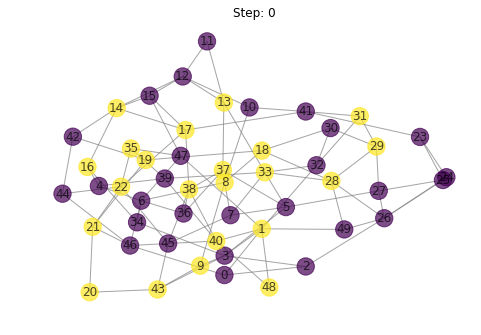

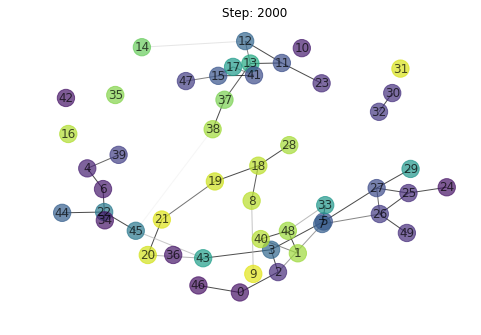

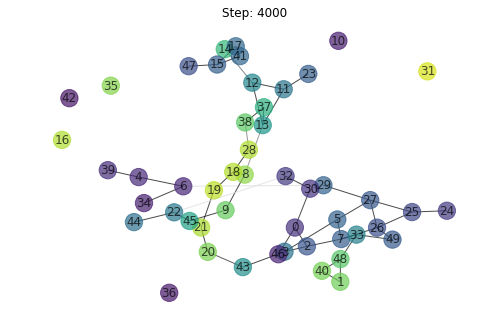

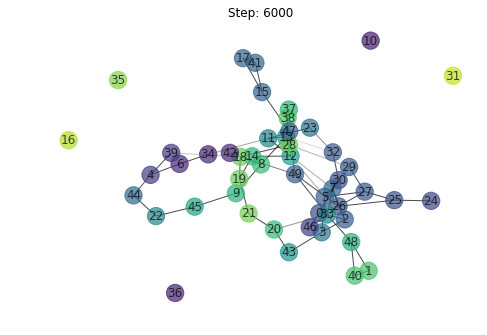

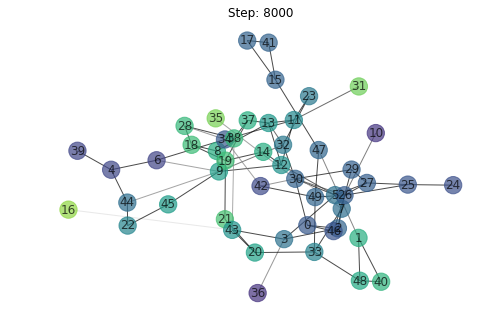

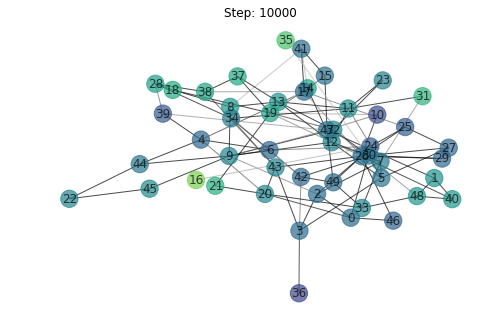

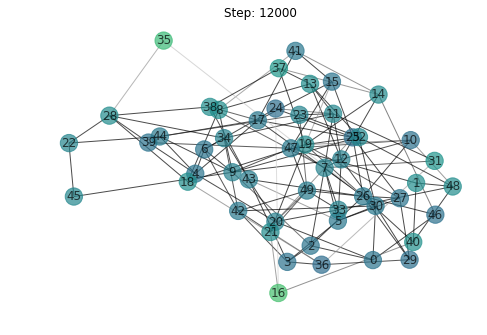

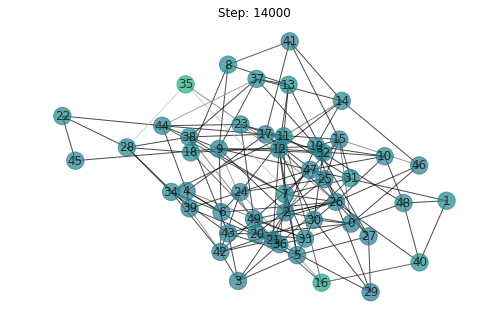

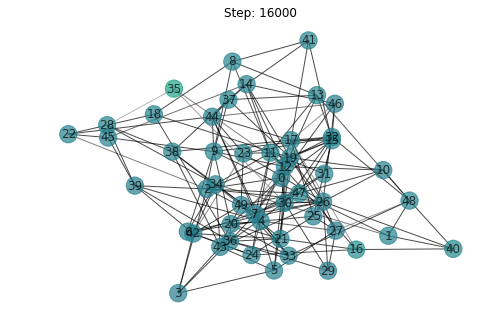

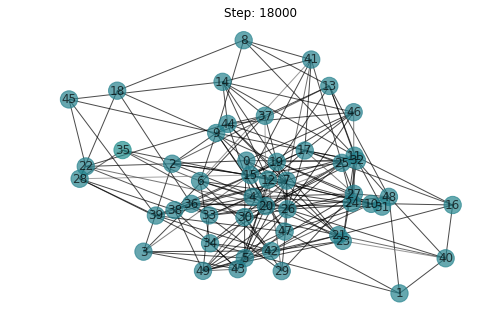

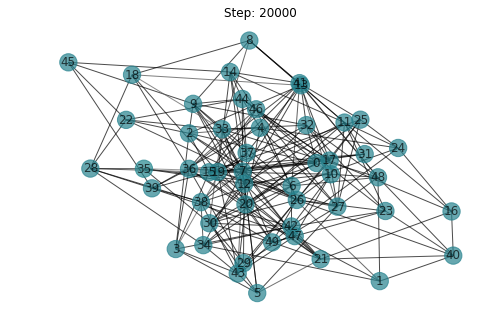

In [3]:
# This code was also taken from class
sim = ModifiedSocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

# Part 4: Simulation Analysis
# Observations
This network appears to converge very quickly, in that all political opinions seem to move toward the center (green) and therefore the network becomes well-connected since relationships don't deteriorate due to opinion differences. My model generally leads to a well-connected, agreeable network.  
While this may not be perfectly accurate, I think my model is better at modelling real world relationships and the old model is better at modelling the the dynamics of one opinion topic, like politics. My model shows what happens when one topic (politics) does not dominate a country. Polarization is much less likely (virtually impossible based on my model, although I greatly exaggerated the impact of sports and music, which made polarization much more difficult).

# Issues
One thing I didn't consider is that politics and religion are often strongly correlated (in the U.S., at least). If a person is very close to 1 in political opinion, then they are far more likely to be close to 1 in religious opinion. For this reason, I think decided to remove the religious opinion and consider it a part of political opinion, since the two are somewhat repetitive. This is not even mentioning the correlations shared between politics and music and sports, which while are less strong, certainly exist.  
The problem seems to be that if we have multiple topics, their behavior is not correlated, and their assignments are random, then our relationships are much more likely to move toward the middle and not deteriorate if they depend on all topics. That is because when relationships depended only on 1 topic, if two people had different opinions, the relationship deteriorated. However, now they must disagree on at least 3/4 of the topics (or at least 2/2 of the important topics) for any progress to be made. Just the fact that 

# Part 5: Trying a New Dirichlet
I actually tried a few new Dirichlets. Obviously, as the Dirichlet parameters become more biased toward one topical variable, we approximate our original one-topic model because one topic is dominating. This is really the only way to get the same polarizing behavior. Which begs the question, how well does our original model demonstrate real-life human interaction? One might argue that today's politics support the original model, since we have seen a large amount of polarization around the world. However, people are still friends. They still have relationships. So maybe the original model is a little too drastic for actual relationships but good for modelling politics (I think).

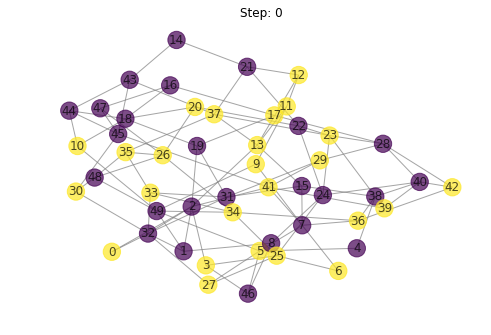

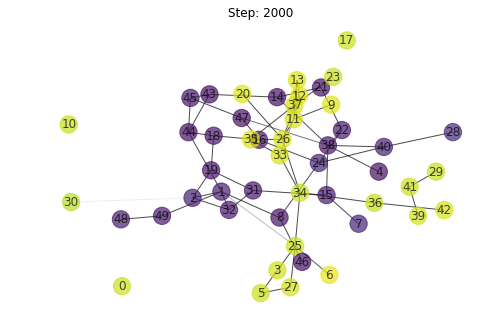

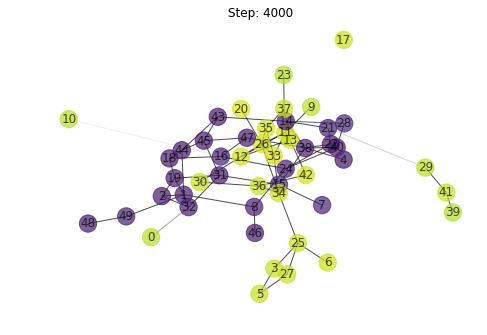

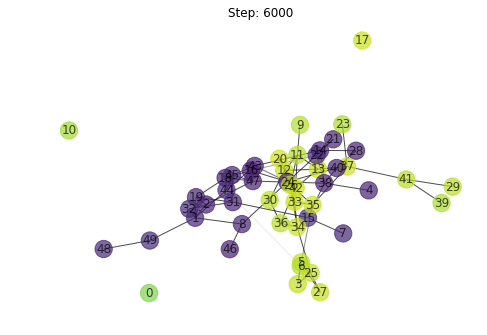

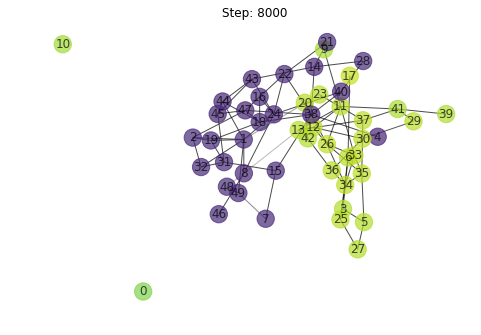

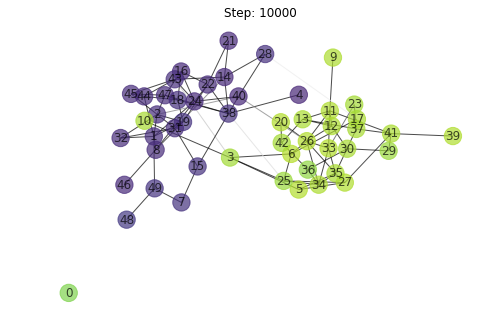

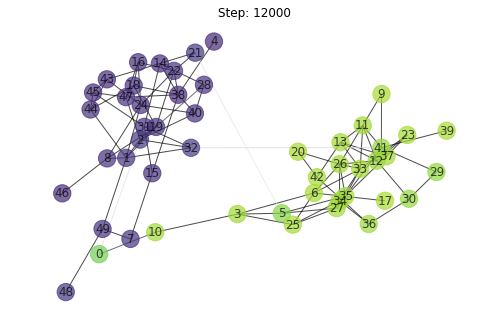

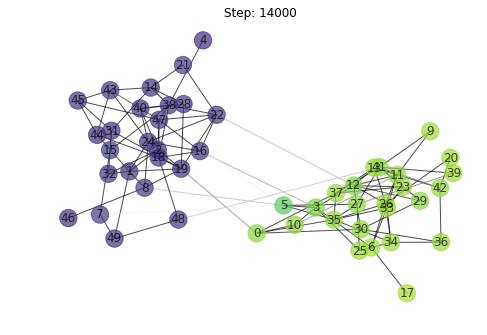

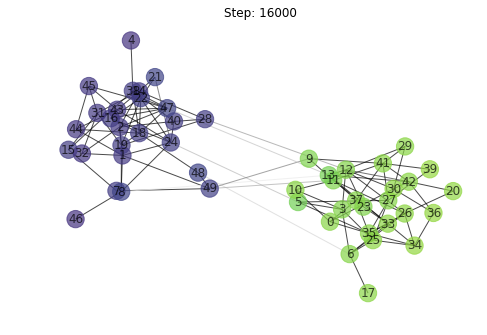

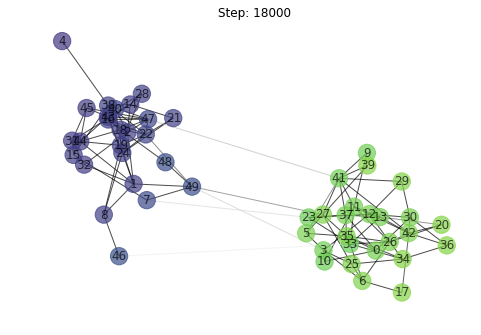

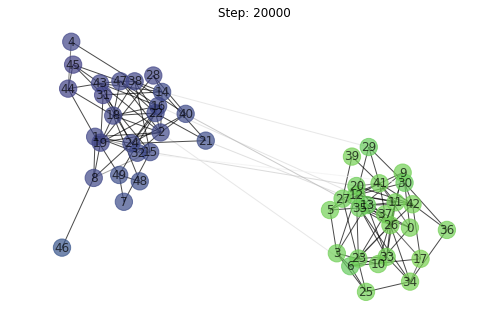

In [4]:
# New Dirichlet alpha
sim = ModifiedSocialDynamicsSimulation(dir_alpha = (10, .5, .5, .5))
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()

# Bonus: Other Modification Ideas
### More personalized parameters/Model persuasiveness
I believe that overall this model could be made more realistic and interesting by adding more personalized parameters. Basically, I think taking the three existing parameters - $\alpha$, $\beta$, and $\gamma$ - and making them different for every person would be the way to go. We have already done so for $\gamma$ to give different opinion topics different weights.  

$\alpha$ - Personalizing $\alpha$ would add persuasiveness to this model. Different people would have different powers of influencing others' opinions.  
$\beta$ - Personalized $\beta$ would be good because I think it would demonstrate that different relationships have different strengths. For example, different political opinions will take much longer to break a relationship between parents and children than between Facebook friends (in fact, the political opinions for a family would be more likely to approach each other before they can ruin relationships, in my optimistic opinion).

# Part 0: The Basic Model

In [5]:
# This code is taken from the implementation done in class,
# at https://gist.github.com/cscheffler/f8f8416513356e184e9568fa69c90889

class SocialDynamicsSimulation:
    '''
    Simulate social dynamics by strengthening opinions and connection weights
    based on random interactions between nodes.
    '''

    def __init__(self, network_size=50, alpha=0.03, beta=0.3, gamma=4):
        '''
        Inputs:

            network_size (int) The number of nodes in the random Watts-Strogatz
              small-world network. Default: 50.

            alpha (float) The rate at which nodes adjust their opinions to
              match neighboring nodes' opinions during interactions.
              Default: 0.03.

            beta (float) The rate at which edge weights are changed in
              response to differing opinions. Default: 0.3.

            gamma (float) The pickiness of nodes. Nodes with opinions differing
              by more than 1/gamma will result in an edge weight decreasing.
              Default: 4.
        '''
        self.network_size = network_size
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma

    def initialize(self):
        '''
        Initialize the simulation with a random graph, with random 0 or 1
        opinions assigned to all nodes and initial edge weights of 0.5.
        '''
        self.graph = nx.watts_strogatz_graph(50, 5, 0.5)
        for edge in self.graph.edges:
            self.graph.edges[edge]['weight'] = 0.5
        for node in self.graph.nodes:
            self.graph.nodes[node]['opinion'] = random.randint(0, 1)
        self.layout = nx.spring_layout(self.graph)  # Initial visual layout
        self.step = 0

    def observe(self):
        '''
        Draw the state of the network.
        '''
        self.layout = nx.spring_layout(self.graph, pos = self.layout, iterations=5)
        plt.clf()
        nx.draw(
            self.graph, pos=self.layout, with_labels=True,
            node_color=[self.graph.nodes[i]['opinion'] for i in self.graph.nodes],
            edge_color=[self.graph.edges[i, j]['weight'] for i, j in self.graph.edges],
            edge_cmap=plt.cm.binary, edge_vmin=0, edge_vmax=1,
            alpha=0.7, vmin=0, vmax=1)
        plt.title('Step: ' + str(self.step))

    def update(self):
        if random.uniform(0, 1) < 0.01:
            # Create a new edge with weight 0.5 between two unconnected nodes
            nodes = list(self.graph.nodes)
            while True:
                new_edge = random.sample(nodes, 2)
                if new_edge not in self.graph.edges:
                    break
            self.graph.add_edge(new_edge[0], new_edge[1], weight=0.5)
        else:
            # Select a random edge and update node opinions and edge weight
            edge = random.choice(list(self.graph.edges))
            weight = self.graph.edges[edge]['weight']
            opinions = [self.graph.nodes[n]['opinion'] for n in edge]
            for i in [0, 1]:
                self.graph.nodes[edge[i]]['opinion'] = (
                    opinions[i] + self.alpha * weight * (opinions[1-i] - opinions[i]))
            self.graph.edges[edge]['weight'] = (
                weight +
                self.beta * weight * (1-weight) *
                (1 - self.gamma * abs(opinions[0] - opinions[1])))
            # Remove very weak connections
            if self.graph.edges[edge]['weight'] < 0.05:
                self.graph.remove_edge(*edge)
        self.step += 1

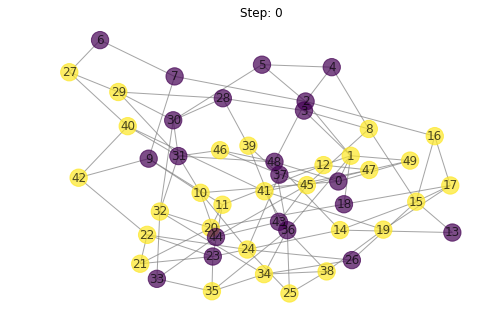

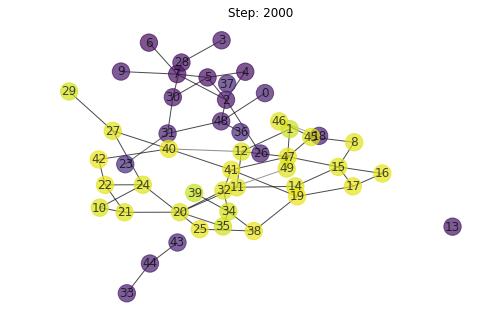

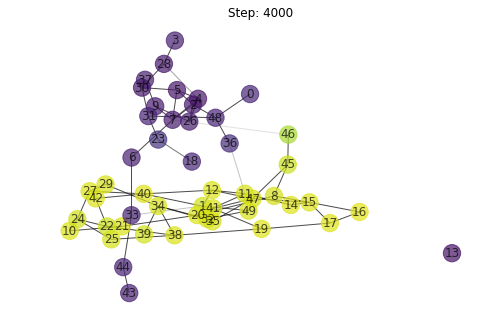

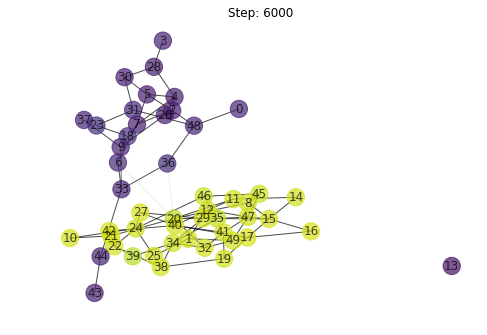

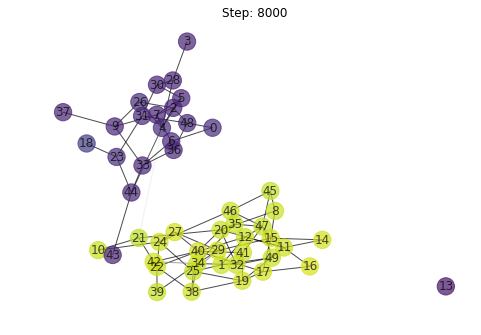

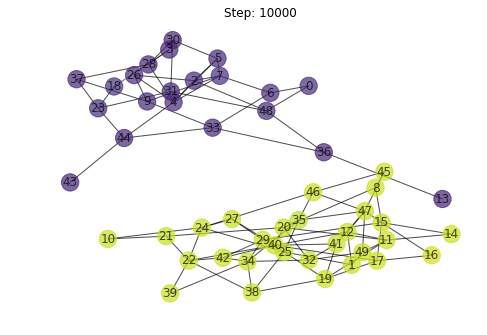

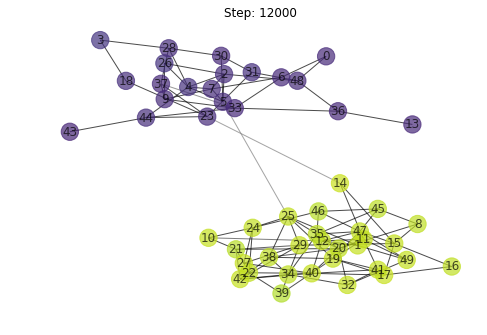

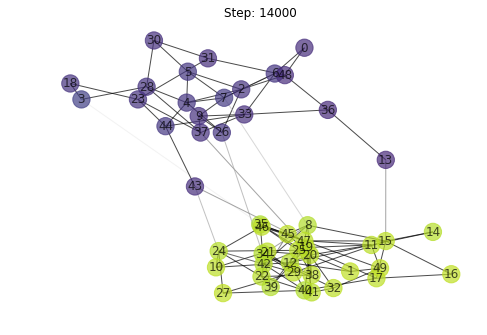

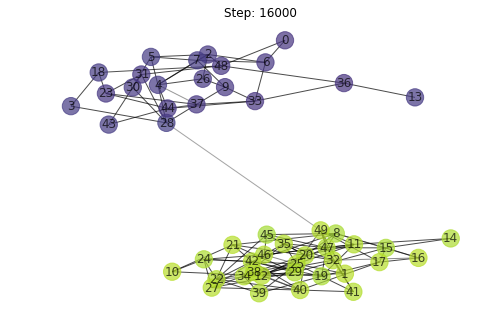

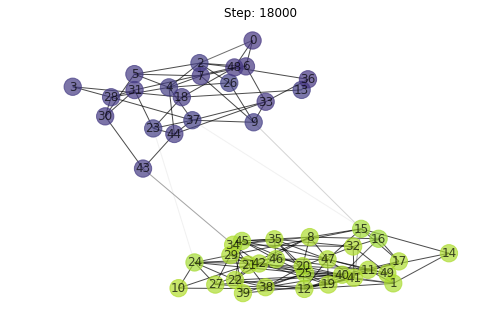

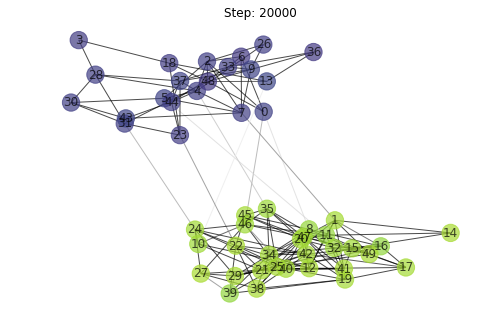

In [6]:
sim = SocialDynamicsSimulation()
sim.initialize()
plt.figure()
sim.observe()
for i in range(10):
    for i in range(2000):
        sim.update()
    plt.figure()
    sim.observe()